<a href="https://colab.research.google.com/github/Sridharpadhy/Cardiovascular-Risk-Prediction/blob/main/Sridhar_ML_Classification_Capstone_Project_Cardiovascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name**    - 
Cardiovascular Risk Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member -** - Sridhar Bhagaban Padhy


# **Project Summary -**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Cardiovascular diseases (CVDs) are the leading cause of death globally.
An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.
Thats why here from the medical history dataset the prediction  is to be done for risk of any coronory heart disease and if it is there it can prevented early as possible .

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
import sklearn
!pip install missingno
import missingno as msno
!pip install shap
import shap
shap.initjs()
!pip install scikit-plot

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 7.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 29.6 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [3]:
#Mount drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#Loading Dataset
cardio_df = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [6]:
# Dataset First Look
cardio_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
cardio_df.shape

(3390, 17)

### Dataset Information

In [8]:
# Dataset Info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

From here we can say that the many columns has null values like education , cigsperday , Bpmeds , totchol , BMI , heartRate , glucose . and many features are having dtype of "float" .

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

In [10]:
cardio_df.duplicated().sum()

0

so , as here we get the false so our dataset has no duplicate values.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

From here we can say that the many columns has null values like education , cigsperday , Bpmeds , totchol , BMI , heartRate , glucose . 

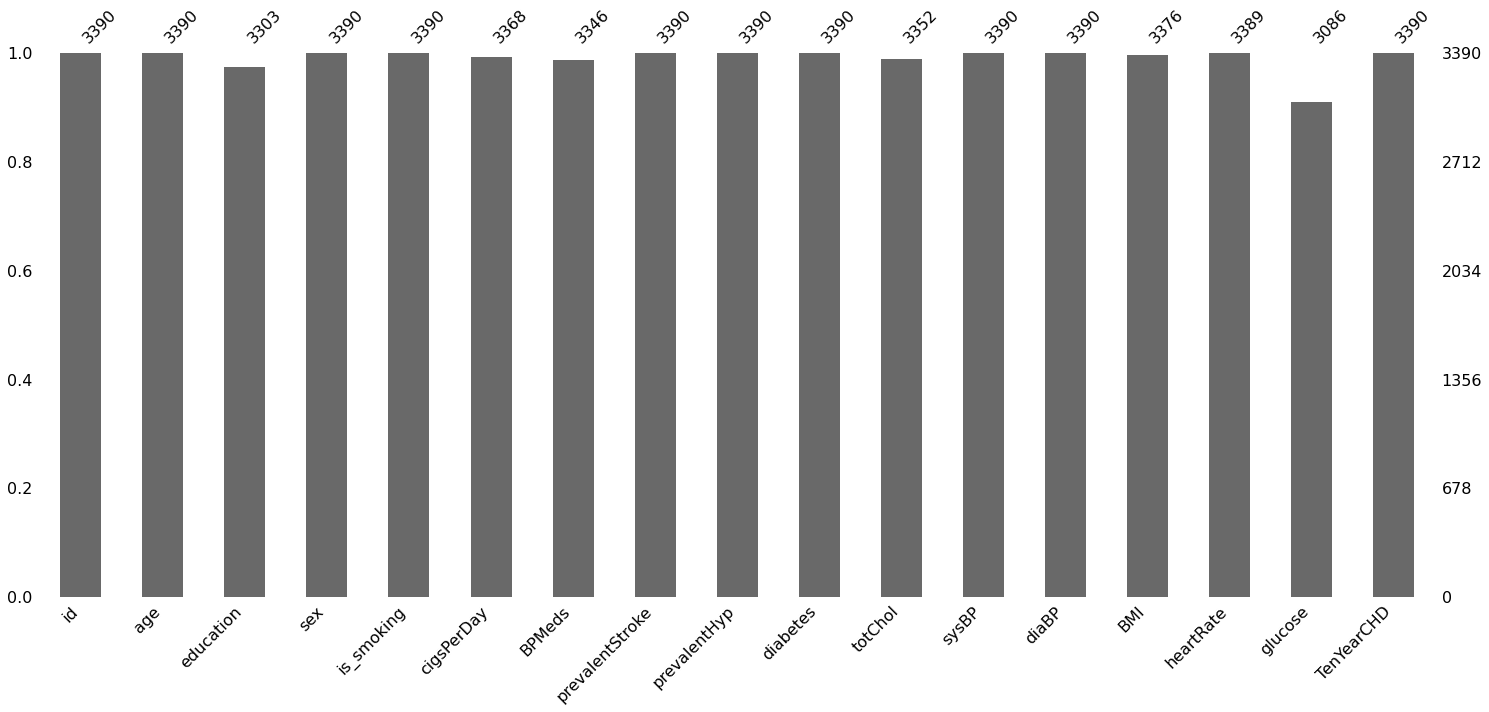

In [12]:
# Visualizing the missing values
import missingno as msno
msno.bar(cardio_df)

In [13]:
cardio_df.isnull()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


### What did you know about your dataset?

So , till now by getting info about the dataset we got so idea about the features the number of null value its info and it doesnot has any duplicate values and many features are catogerical many has the dtype of float also.
Data set is in csv format, it has 3390 rows and 17 columns.

7 columns have null values namely:

education column has 87 null values, cigs_per_day has 22, BP_Meds has 44, totchol has 38, BMI has 14, and glucose ha 304. since our data set is very small we cannnot remove or drop null values,and also all the rows and their information is important for future prediction and all values has important roles so ,  we can only replace them. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
cardio_df.describe().round(2)

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,1694.50,49.54,1.97,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,978.75,8.59,1.02,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,847.25,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,1694.50,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2541.75,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


### Variables Description 

The following columns are:

Id : It contains unique Id of patients from 0 to 3390.

Age : It contains the age of patients for which we have to predict CHD.

Education : It has Education of the patients 1,2,3,4.

Sex : It contains the gender of the patients whether the patient is Male or Female.

is_smoking : This columns contains whether the patient is smoking or not. So values in it is in either YES or NO.

cigsPerDay : It contains the quantity of cigarette the patient consumes per day.

BPmeds : It contains whether the patient is taking BP Medicine or not. Here, 1 
means patient is taking BP medicines and 0 means patient is not taking medicines.

pevalentStroke : It contains whether the patient has history of stroke or not. Here, if it is yes then it should be 1 or if no then it should be 0.

prevalentHyp : It contains whether the patient has history of hypertension or not. Here, 1 denotes he has hypertension before and 0 denotes the patient doesnot have hypertension.

Diabetes : It contains whether the patient has diabetes or not. Here, 1 means patient has diabetes and 0 means patient doesnot have diabetes.

totChol : It contains the measure of the cholestrol of the patients.

sysBP : It contains systollic Blood Pressure measure of the patients.

diaBP : It contains diastolic Blood Pressure measure of the patients.

BMI : It contains Body Mass Index of the patients.

heartRate : It contains the heart rate of the patients.

glucose : It contains the glucose level of the patients.

TenYearCHD : It contains whether the patients whether a patient has a 10 year risk of future coronary heart disease(CHD).

### Check Unique Values for each variable.

In [ ]:

for col in cardio_df.columns :
  values = cardio_df[col].unique()
  print(f' # - SO the unique values of {col} is {values} ' )

 # - SO the unique values of id is [   0    1    2 ... 3387 3388 3389] 
 # - SO the unique values of age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32] 
 # - SO the unique values of education is [ 2.  4.  1.  3. nan] 
 # - SO the unique values of sex is ['F' 'M'] 
 # - SO the unique values of is_smoking is ['YES' 'NO'] 
 # - SO the unique values of cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.] 
 # - SO the unique values of BPMeds is [ 0. nan  1.] 
 # - SO the unique values of prevalentStroke is [0 1] 
 # - SO the unique values of prevalentHyp is [0 1] 
 # - SO the unique values of diabetes is [0 1] 
 # - SO the unique values of totChol is [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
#Data Cleaning

###  Handling Missing Values 

Education and BPMeds are categorical variables. So, we will be filling the null values with mode of the data of the respective columns.While ,  cigsPerDay, totChol, BMI, heartRate and glucose are continuous variables. We will be filling the null values with the median of the data of the respective columnns.

In [15]:
cardio_df[cardio_df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [16]:
#But for column cigperday median is 0 .
cardio_df['cigsPerDay'].median()

0.0

so , The median for cigsPerDay is coming as zero and if we are filling the null values of cigsPerDay as zero it will not be correct as in is_smoking it is mentioned as Yes. So, we will be filling the null values of cigsPerDay with mean of the data.

In [17]:
cardio_df['cigsPerDay'] = cardio_df['cigsPerDay'].fillna(round(cardio_df['cigsPerDay'].mean(), 1))

In [18]:
#def a function for all the mode columns 
def fillna_mode (column):
 for col in column:
   cardio_df[col]=cardio_df[col].fillna(round(cardio_df[col].mode()[0],1))
  

In [19]:
#def a function for all the median columns
def fillna_median (column):
  for col in column:
   cardio_df[col]=cardio_df[col].fillna(cardio_df[col].median())

In [20]:
fillna_mode(['education','BPMeds'])
fillna_median(['totChol','BMI','heartRate','glucose'])


In [21]:
cardio_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

so , we can say that all the null values are successfully handeled.

In [22]:
cardio_df.loc[(cardio_df['cigsPerDay']== 0) &  (cardio_df['is_smoking']== 'YES')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [23]:
cardio_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [24]:
#so , by this we saw that is there any values present where smoking is yes and the cigperday is 0 but it seems perfect.

In [25]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [26]:
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

### What all manipulations have you done and insights you found?

 We have just handled the missing null values and seen some columns like cigs per day and issmoking is there any misvalues or not orther than that we have just classified columns into categorical and numerical so that it becomes easy when we are performing EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate**

#### Chart - 1

In [ ]:
#Target value distribution

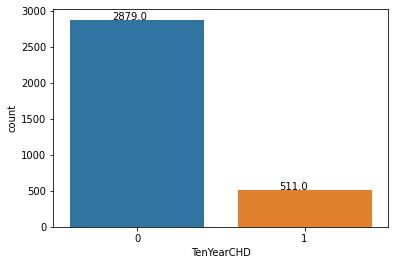

In [ ]:
ax= sns.countplot(cardio_df['TenYearCHD'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

 Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Distribution of dependent variable shows that very less number of people (511) are prone to cardiovascular risk. Graph clearly shows that 2879 people are out of risk zone.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will give positive output for our prediction

#### Chart - 2

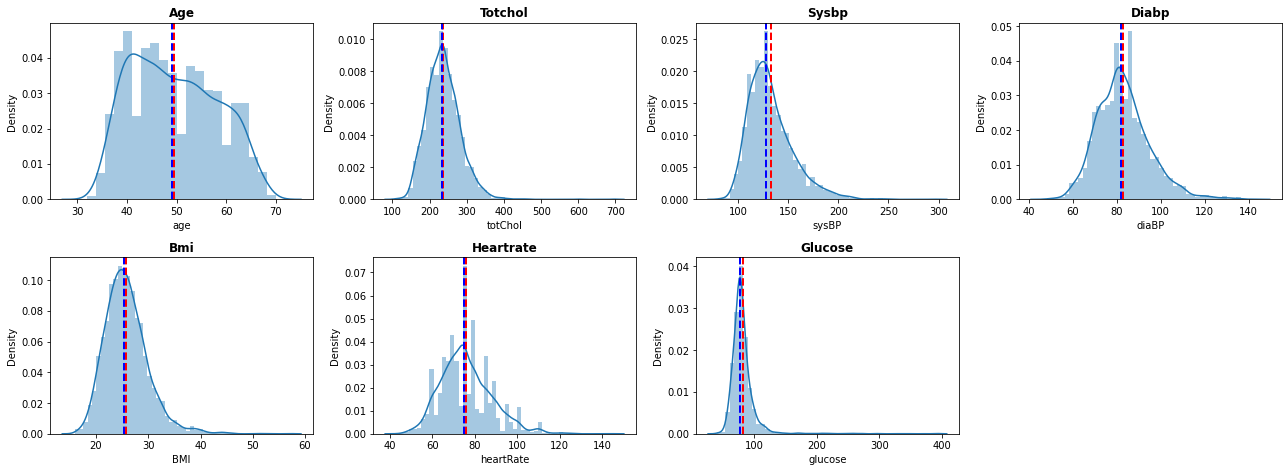

In [ ]:
# Chart - 2 visualization code
#'Numerics feature distribution'
plt.figure(figsize=(18,16))
for n,column in enumerate(numerical_columns):
  feature = cardio_df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.distplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

FRom the univariate graph many insights we got and some of them are like most of the features are normally distributed or close to normal distribution.

Age distribution displays a mean or avrage of 49.5 and the data ranges from 35 to 70.

TotChol has range from 100 to 700 with an average of around 240.

SysBP has range from 90 to 300 with an average of around 140.

DiaBP has range from 55 to 140 with an average of around 82-83.

BMI represents a normal distribution with most values between 20-40 and few exceeding values, it has an average ofaround 25.

HeartRate distribution displays a mean or average of 75 and the data ranges from 55 to 140.

Glucose distribution is highly skewed with its lowest value being 50 to its highest value 400 average of this distribution is around 80.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is giving all the insights and how it will effect our prediction and gentle idea about it.

### Bivariate

#### Chart - 3

In [ ]:
#Function to plot the feature distribution with respect to TenYearCHD
def bar_wrt_Target(col):
  '''This function plot the distribution for a given feature with respect to TenYearCHD.
  Pass the feature name in str to plot the graph.'''
  if len(cardio_df.groupby([col,'TenYearCHD'])['id'].count())>60:
     plt.figure(figsize = (50,15))
  else:
     plt.figure(figsize = (15,7))
  plt.title(f'{col} distribution with respect to TenYearCHD')
  sns.barplot(x = col, y = 'id', hue = 'TenYearCHD',data = cardio_df.groupby([col,'TenYearCHD'])['id'].count().reset_index())
  plt.legend(loc = 'upper right', title = 'TenYearCHD')
  plt.xticks(rotation = 90)
  plt.show()
     

Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

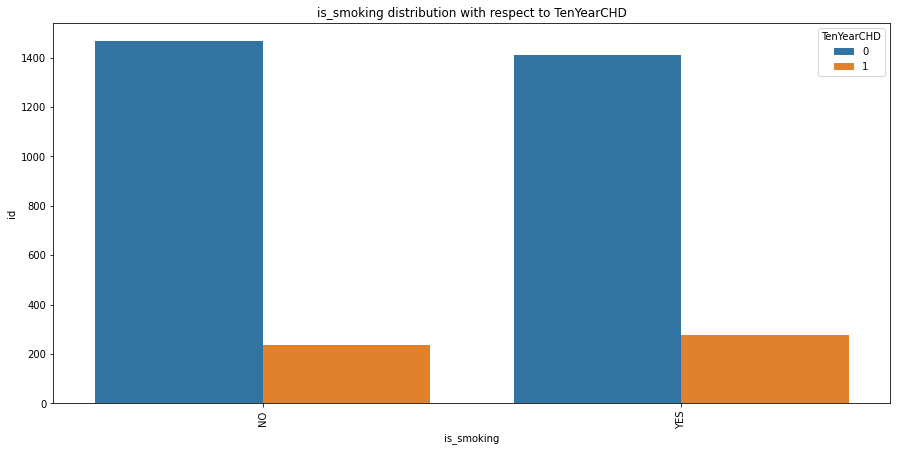

In [ ]:
# Chart - 3 visualization code
bar_wrt_Target('is_smoking')

##### 1. Why did you pick the specific chart?

As we know bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?

Above plot shows that even if the person is not smoking he/she is at equal risk of cardiovascular diseases when compared to people who are smoking.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No , there is no insights towards positive or negative , just it says that the result of happening CHD can be lean any side of person smoking or not.

#### Chart - 4

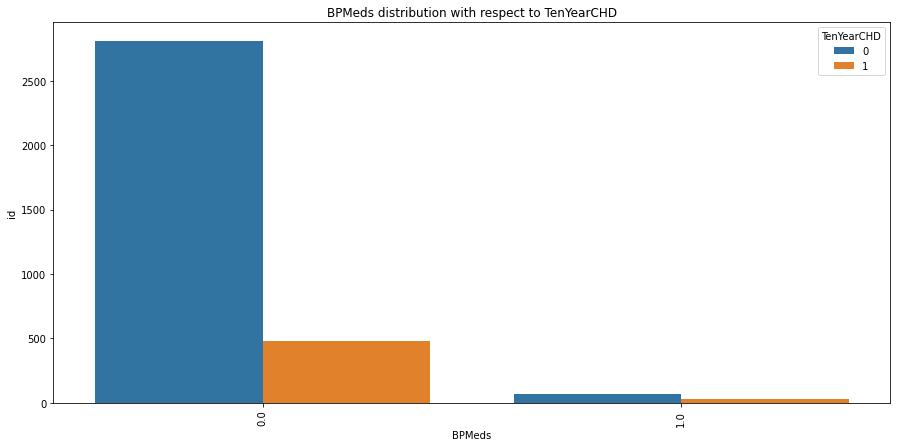

In [ ]:
# Chart - 4 visualization code
bar_wrt_Target('BPMeds')

##### 1. Why did you pick the specific chart?

For BPMeds distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

 Very less number of people were found to be taking BP medicines and 50% of them were at higher risk to cardiovascular disease. And also those people how doesnot have bp problem or dont take medicine can even has change to CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , it goes to the negative side that the Bp can lead to chd at some extent

#### Chart - 5

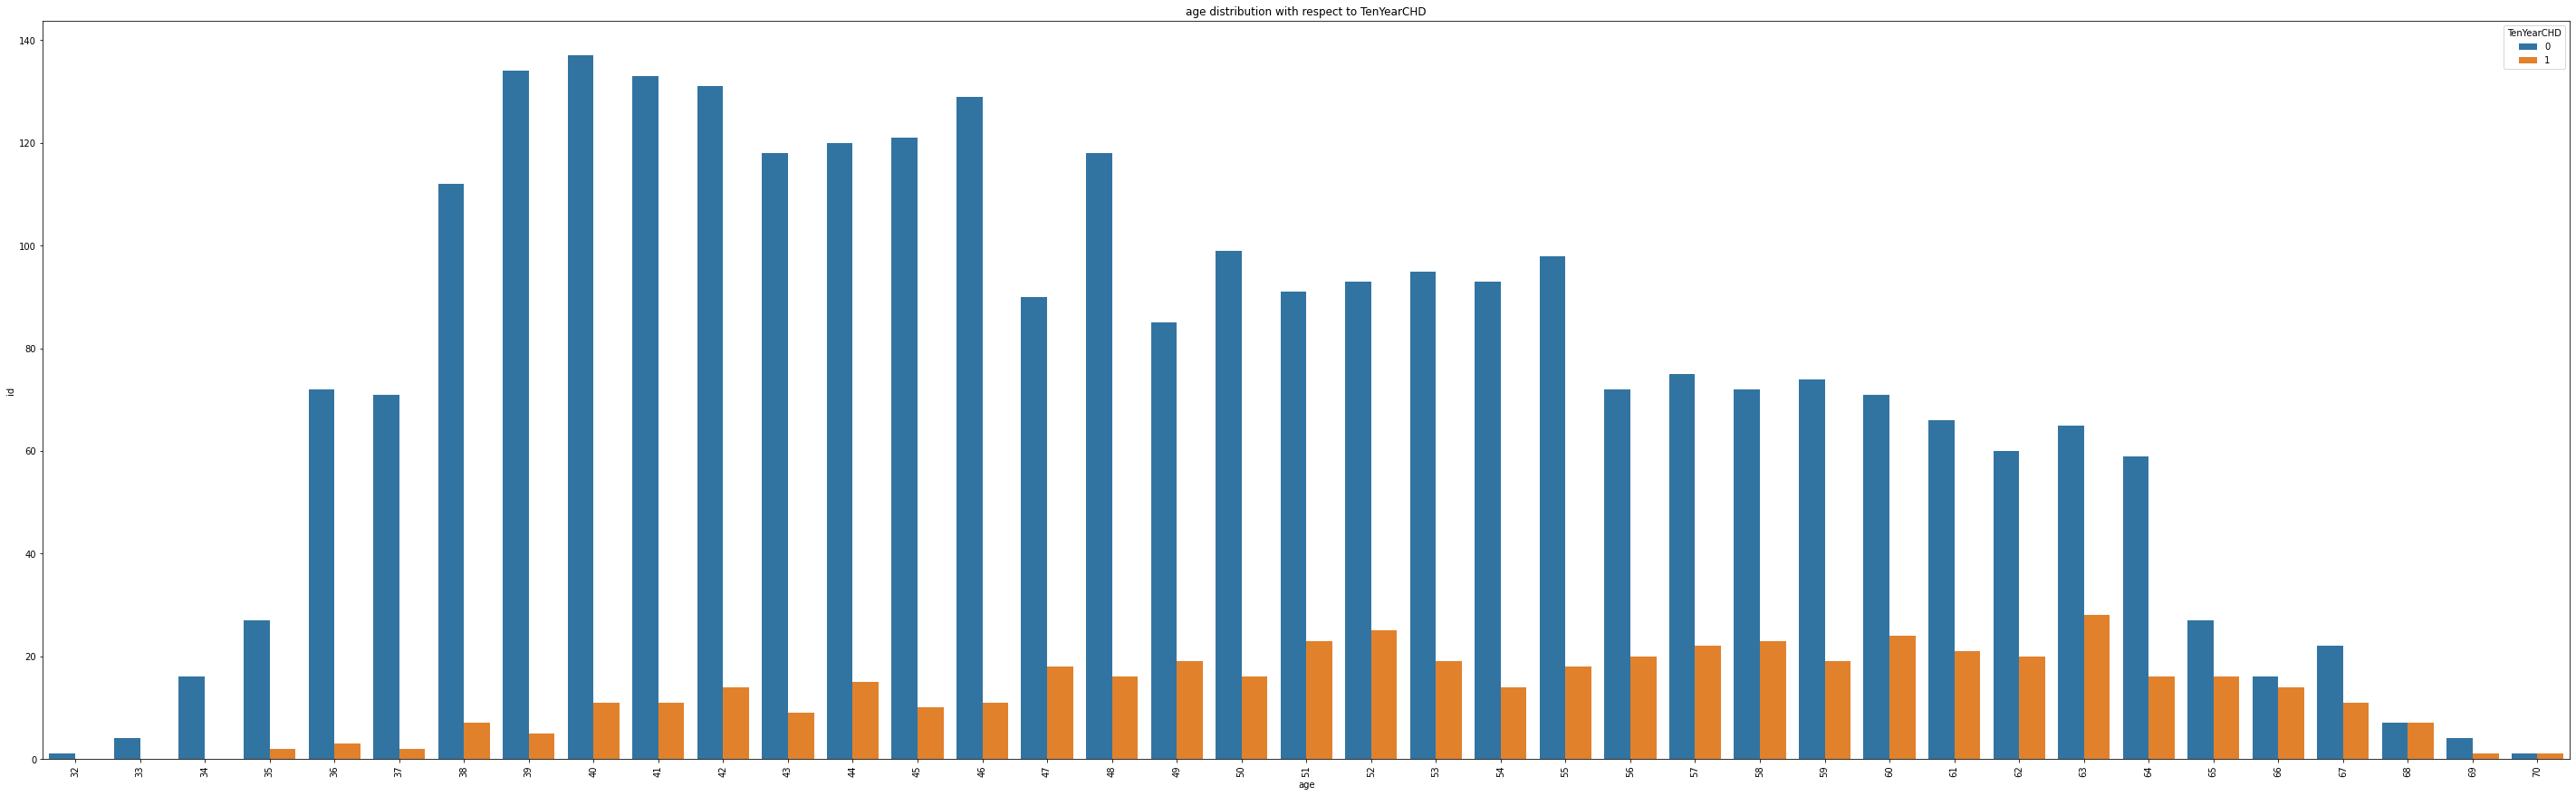

In [ ]:
# Chart - 5 visualization code
bar_wrt_Target('age')

##### 1. Why did you pick the specific chart?

Age distribution with respect to CHD risk has been represented using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

With increasing age, chances of having cardiovascular disease increases. As the graph shows people from age 50 acquires higher risk of cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , it leads to negative growth says that as age grows more changes occur and more changes go to happen chd.

#### Chart - 6

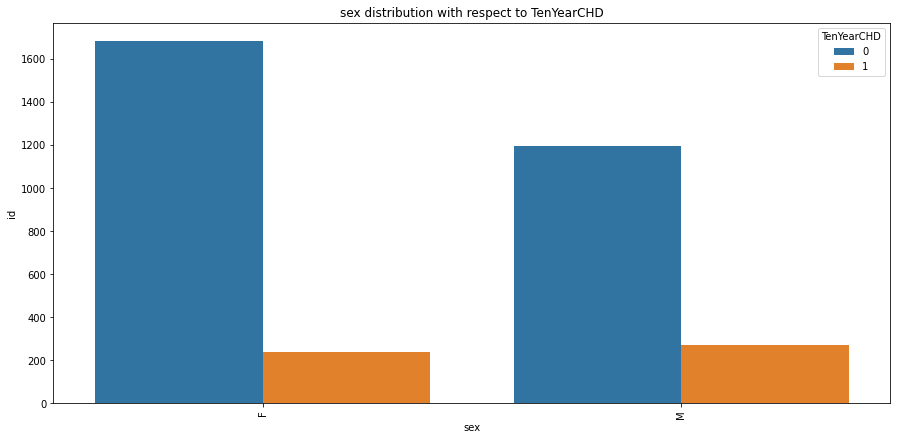

In [ ]:
# Chart - 6 visualization code
bar_wrt_Target('sex')

##### 1. Why did you pick the specific chart?

Gender and CHD risk has been represented using bar charts,Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

As compared to females, males are prone to cardiovascular risks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO , it doesnt make any difference both group has same change.

#### Chart - 7

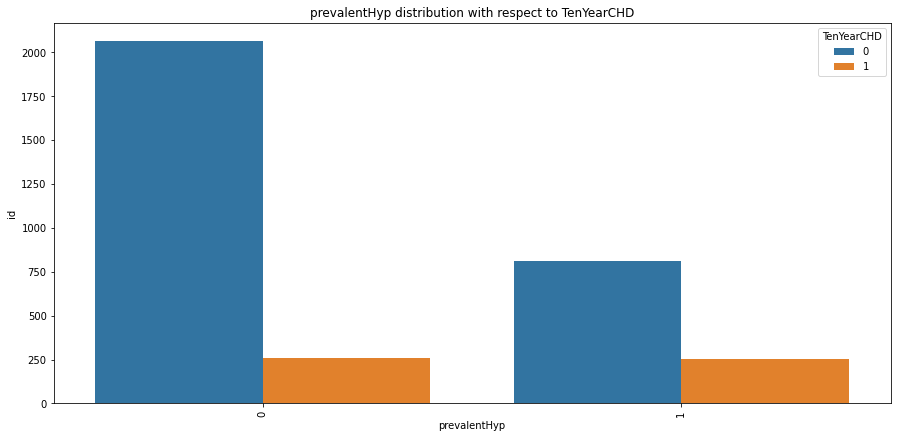

In [ ]:
# Chart - 7 visualization code
bar_wrt_Target('prevalentHyp')

##### 1. Why did you pick the specific chart?

Prevalent hypertension has also been represented using bar charts as, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Above graph shows that people already having hypertension are more prone to cardiovascular disease as compared to people not having hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO , it doesnt make any difference both group has same change.

#### Chart - 8

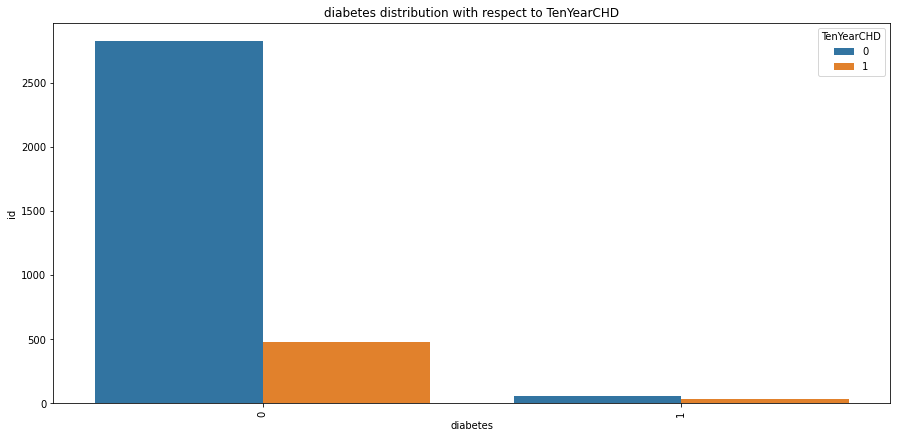

In [ ]:
# Chart - 8 visualization code
bar_wrt_Target('diabetes')

##### 1. Why did you pick the specific chart?

For distribution of diabetes with respect to CHD risk bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Diabetic people are at very high risk of getting cardiovascular disease. As the graph shows among 87 people 61.1% of population are at higher risk of getting cardiovascular disease.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO , it doesnt make any difference both group has same change. but the diabete paintent has some how more change .

#### Chart - 9

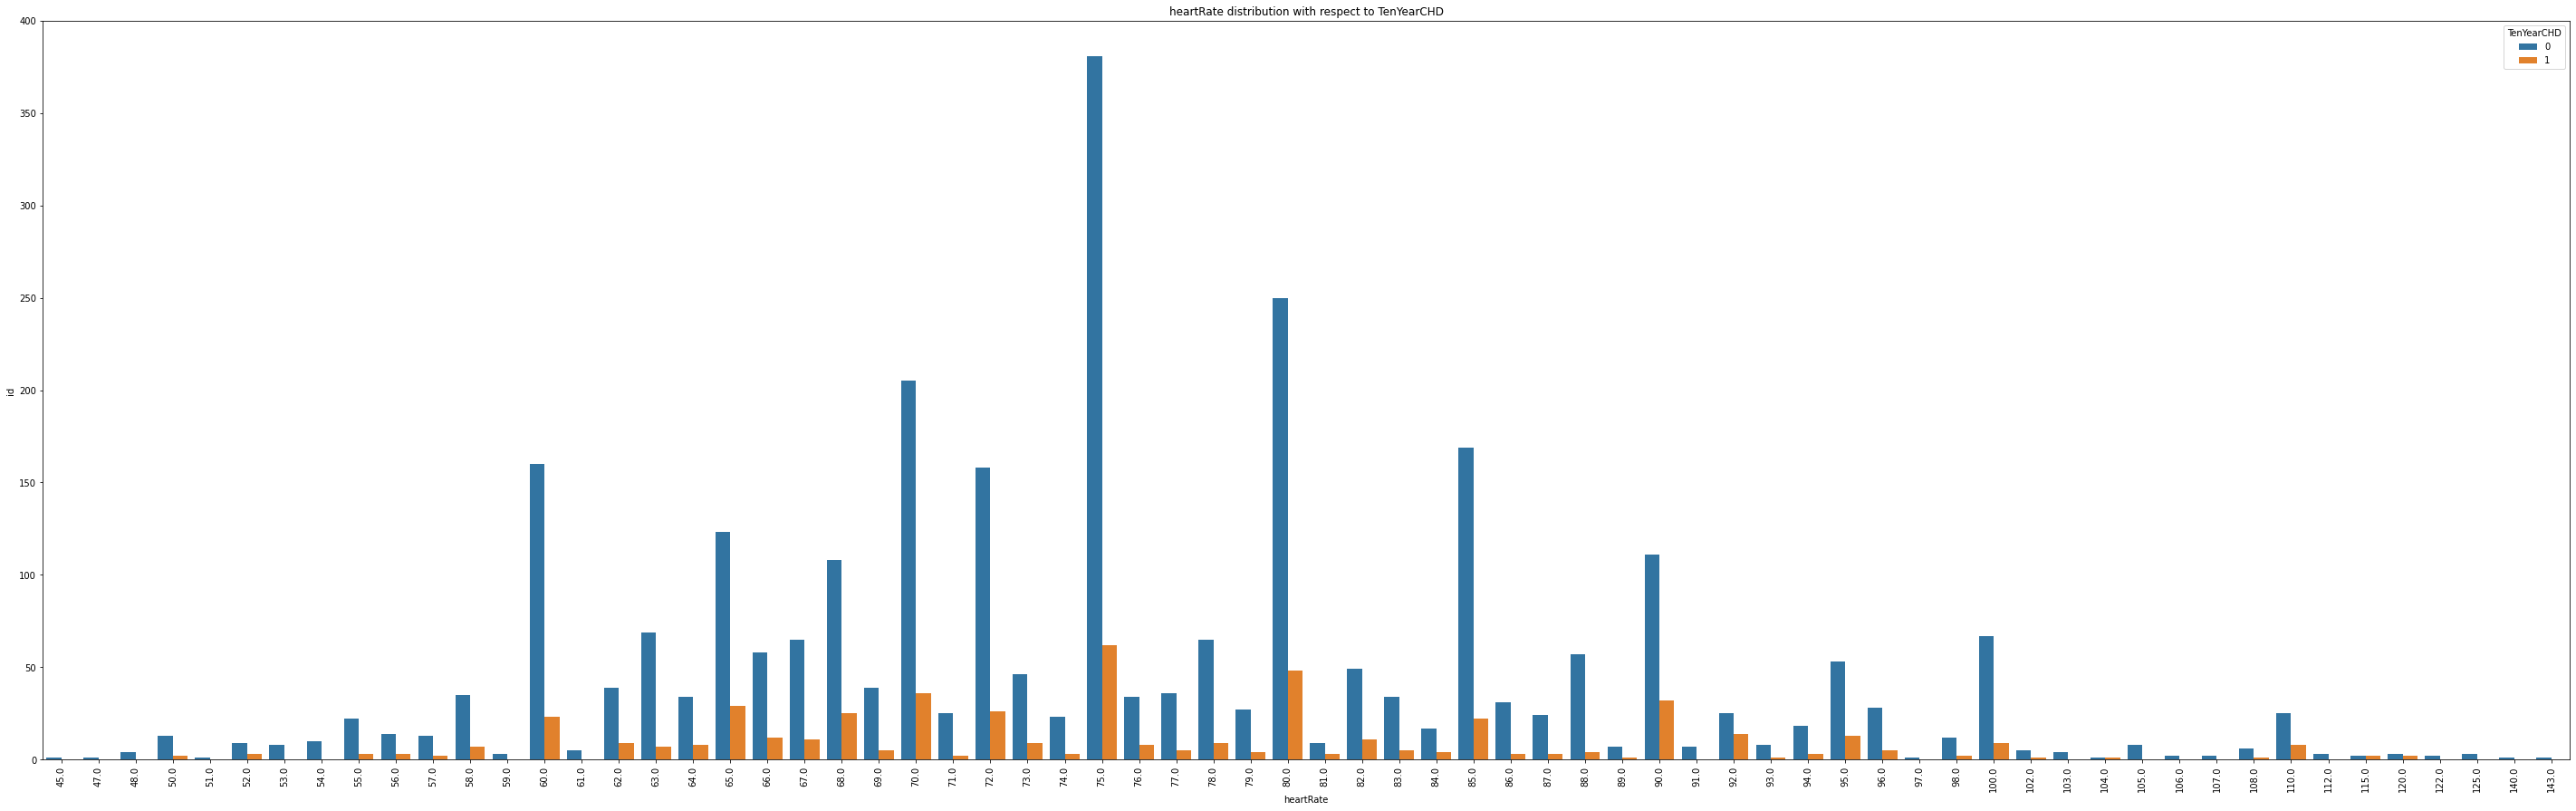

In [ ]:
bar_wrt_Target('heartRate')

##### 1. Why did you pick the specific chart?

Herat rate and CHD risk has also been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.

##### 2. What is/are the insight(s) found from the chart?

A large proportion of population was found to have normal heart rate i.e, 75 bpm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO , it doesnt make any difference .

#### Chart - 10

If your BMI is:

below 18.5 – you're in the underweight range
between 18.5 and 24.9 – you're in the healthy weight range
between 25 and 29.9 – you're in the overweight range
between 30 and 39.9 – you're in the obese range

Text(0.5, 1.0, 'BMI vs Age')

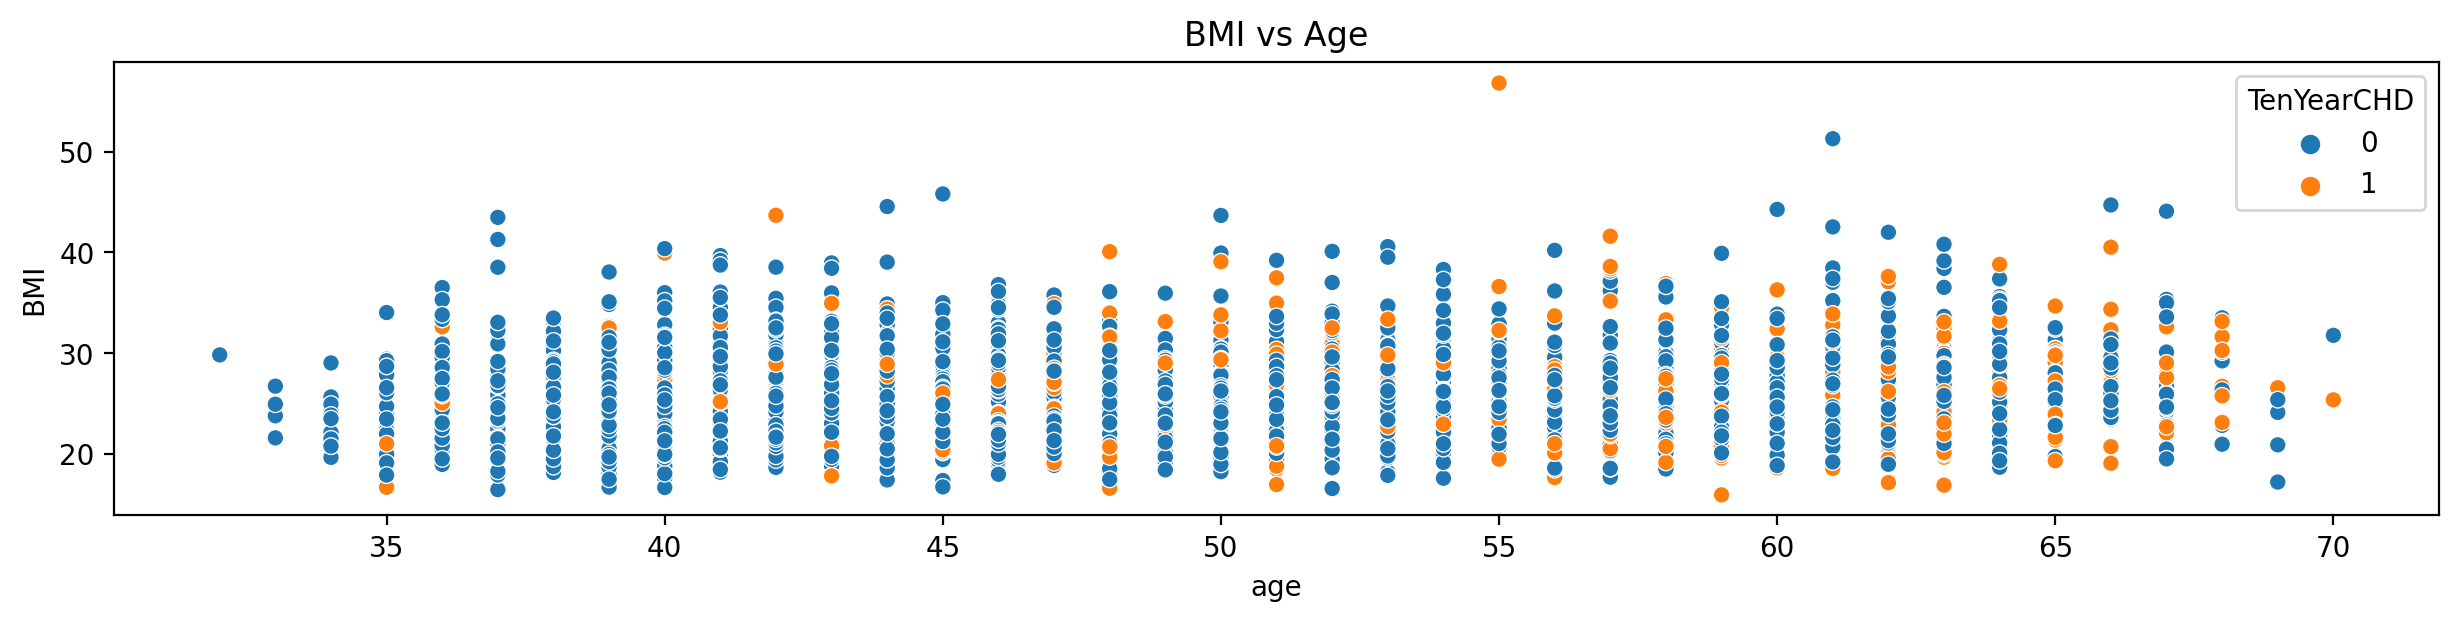

In [ ]:
# Chart - 10 visualization code
figure = plt.subplots(figsize=(15,3), dpi=200)
sns.scatterplot(data=cardio_df, x='age', y='BMI', hue='TenYearCHD')
plt.title('BMI vs Age')

##### 1. Why did you pick the specific chart?

Distribution of age and BMI with respect to CHD risk uses ascatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Above scatterplot suggests that age has no correlation with BMI. Number of points showing people at risk, increases with increase in age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO , it doesnt make any difference . the age becames one of the make factor for the future prediction.

#### Chart - 11

Text(0.5, 1.0, 'Systolic BP vs diastolic BP')

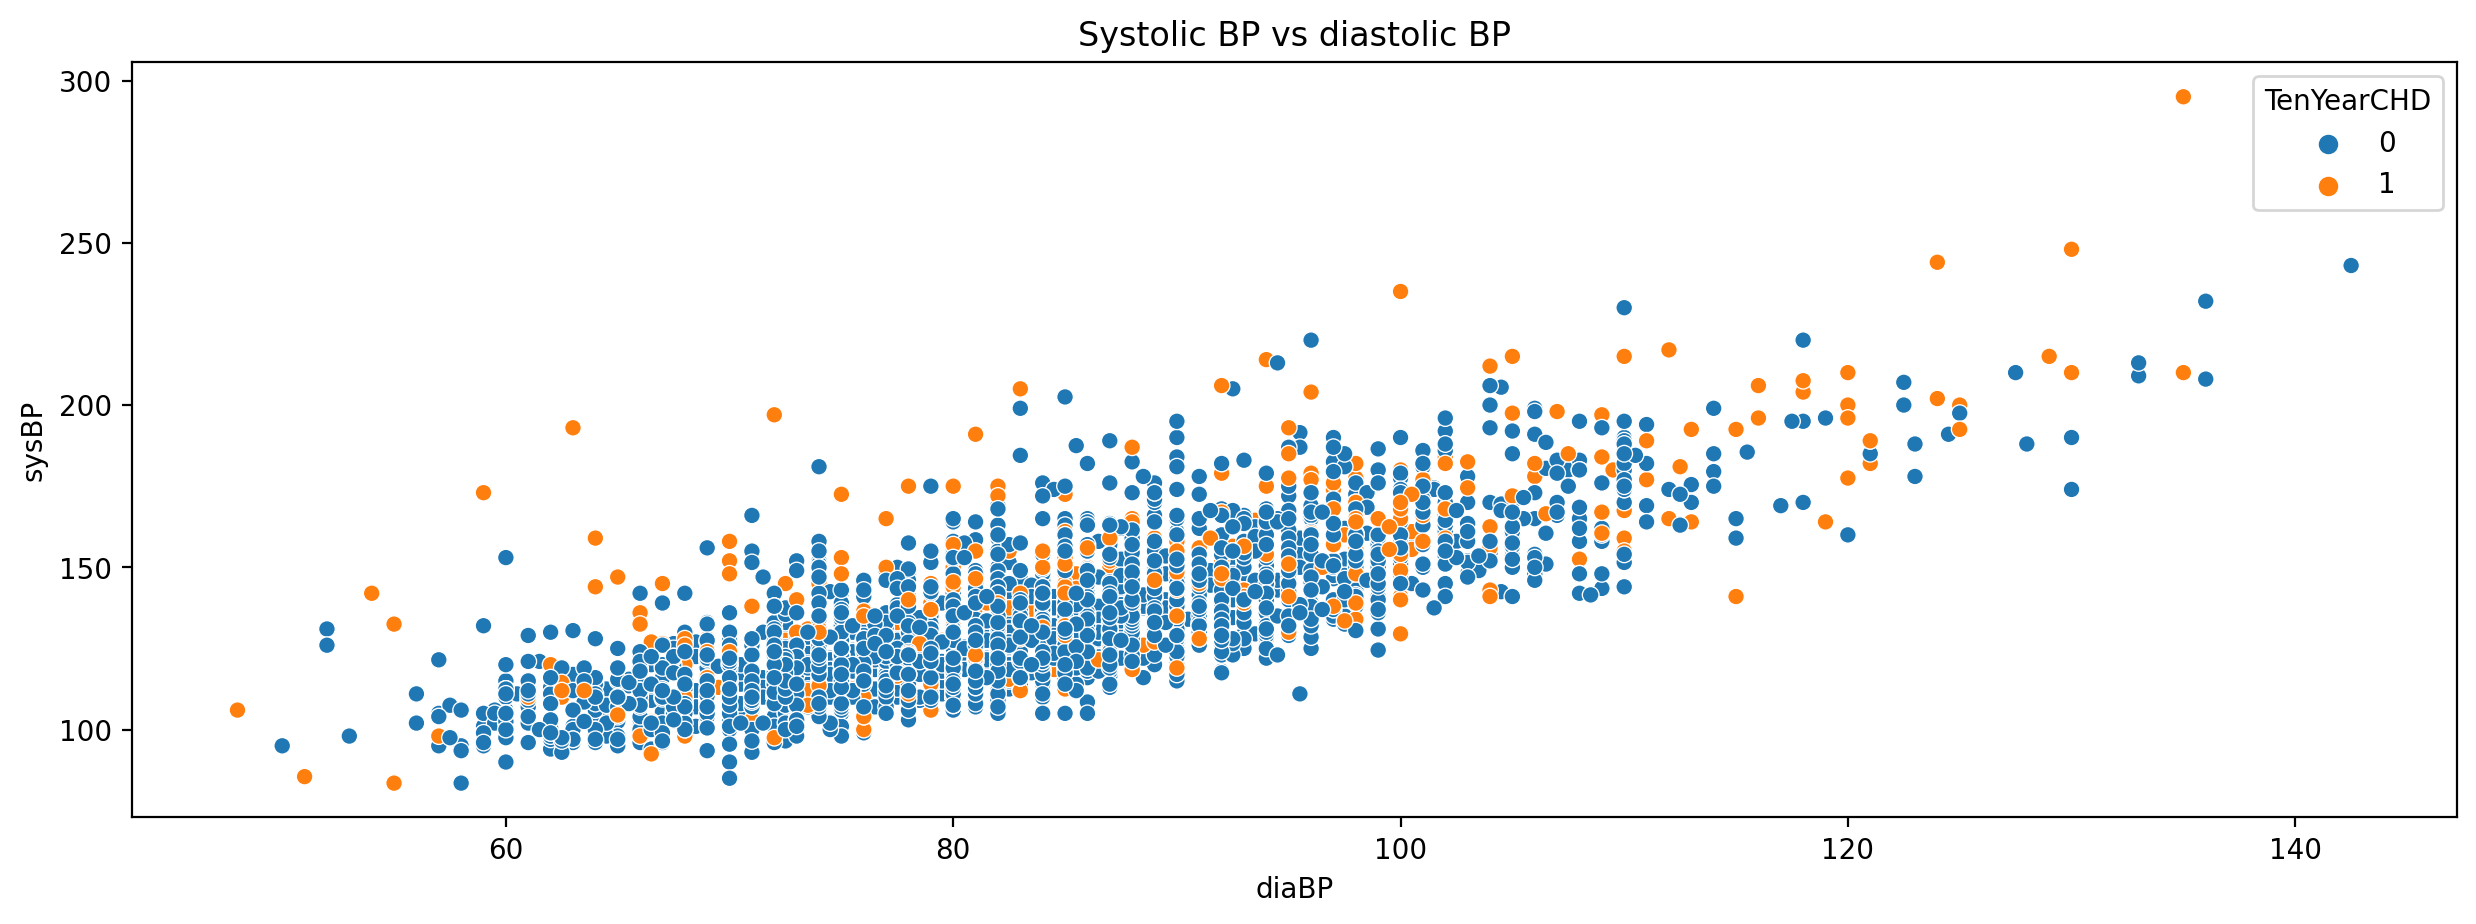

In [ ]:
# Chart - 11 visualization code
figure=plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=cardio_df, y='sysBP', x='diaBP', hue='TenYearCHD')
plt.title('Systolic BP vs diastolic BP')

##### 1. Why did you pick the specific chart?

We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Above graph shows that systolic blood pressure is positively correlated to diastolic blood pressure. As systolic and diatolic pressure increases risk of getting cardiovasclar diseases also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it grows towards the negative growth and this sys and dia both create major factor towards the growth of chd.

#### Chart - 12


Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot

High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
*Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.

High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

[Text(0.5, 1.0, 'Cholestrol by gender ')]

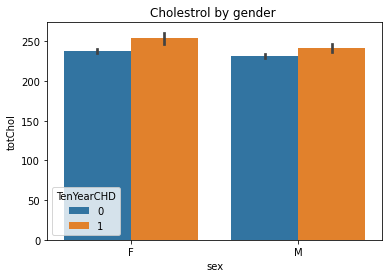

In [ ]:

sns.barplot(data=cardio_df, y='totChol', x='sex', hue='TenYearCHD').set(title='Cholestrol by gender ')


##### 1. Why did you pick the specific chart?

bar chart is Showing the cholestrol level according to gender having the CHD or not .

##### 2. What is/are the insight(s) found from the chart?

Female has more cholesterol as compared to male. so, it it can cause your blood vessels to narrow and increase your risk of developing a blood clot.
More cholesterol increases CHD problem.


### **Multivariate**

#### Chart - 14 - Correlation Heatmap

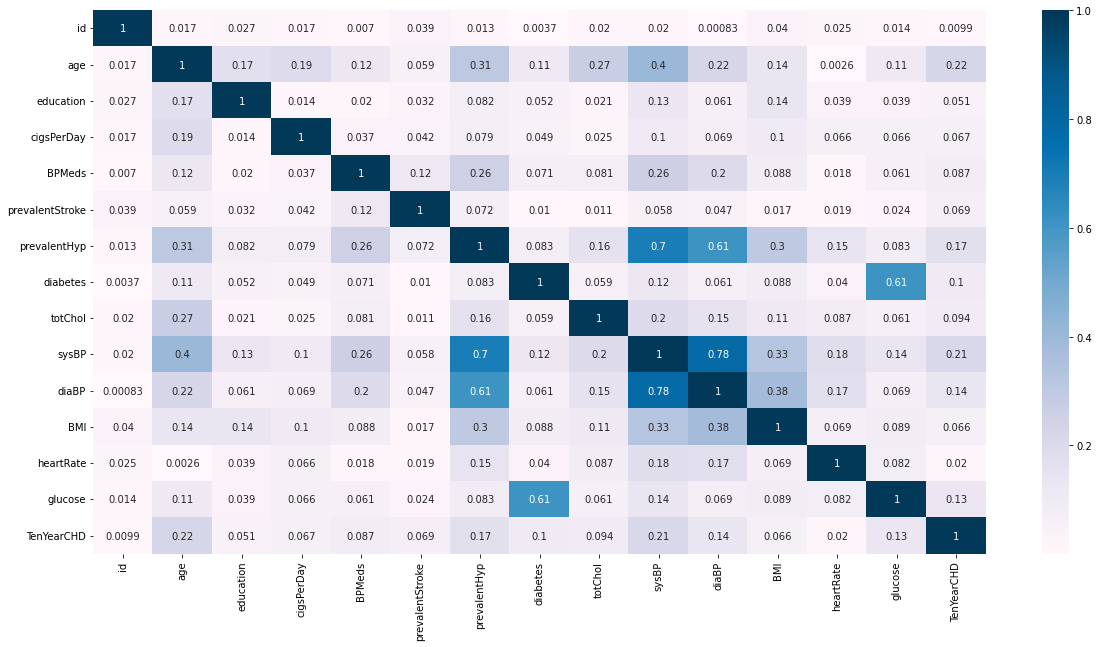

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(cardio_df.corr().abs(),annot=True,cmap='PuBu')

##### 1. Why did you pick the specific chart?

Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

‘sysBP’ is moderately correlated with ‘prevalenthyp’, i.e. prevalent hypertension.
‘diaBP’ and ‘sysBP’ are somewhat moderately correlated.
‘glucose’ level are also moderately correlated to whether patient is diabetic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it grows towards the negative growth , because the more correlated variables can create error or problem in the future prediction of chd.

#### Chart - 15 - Pair Plot 

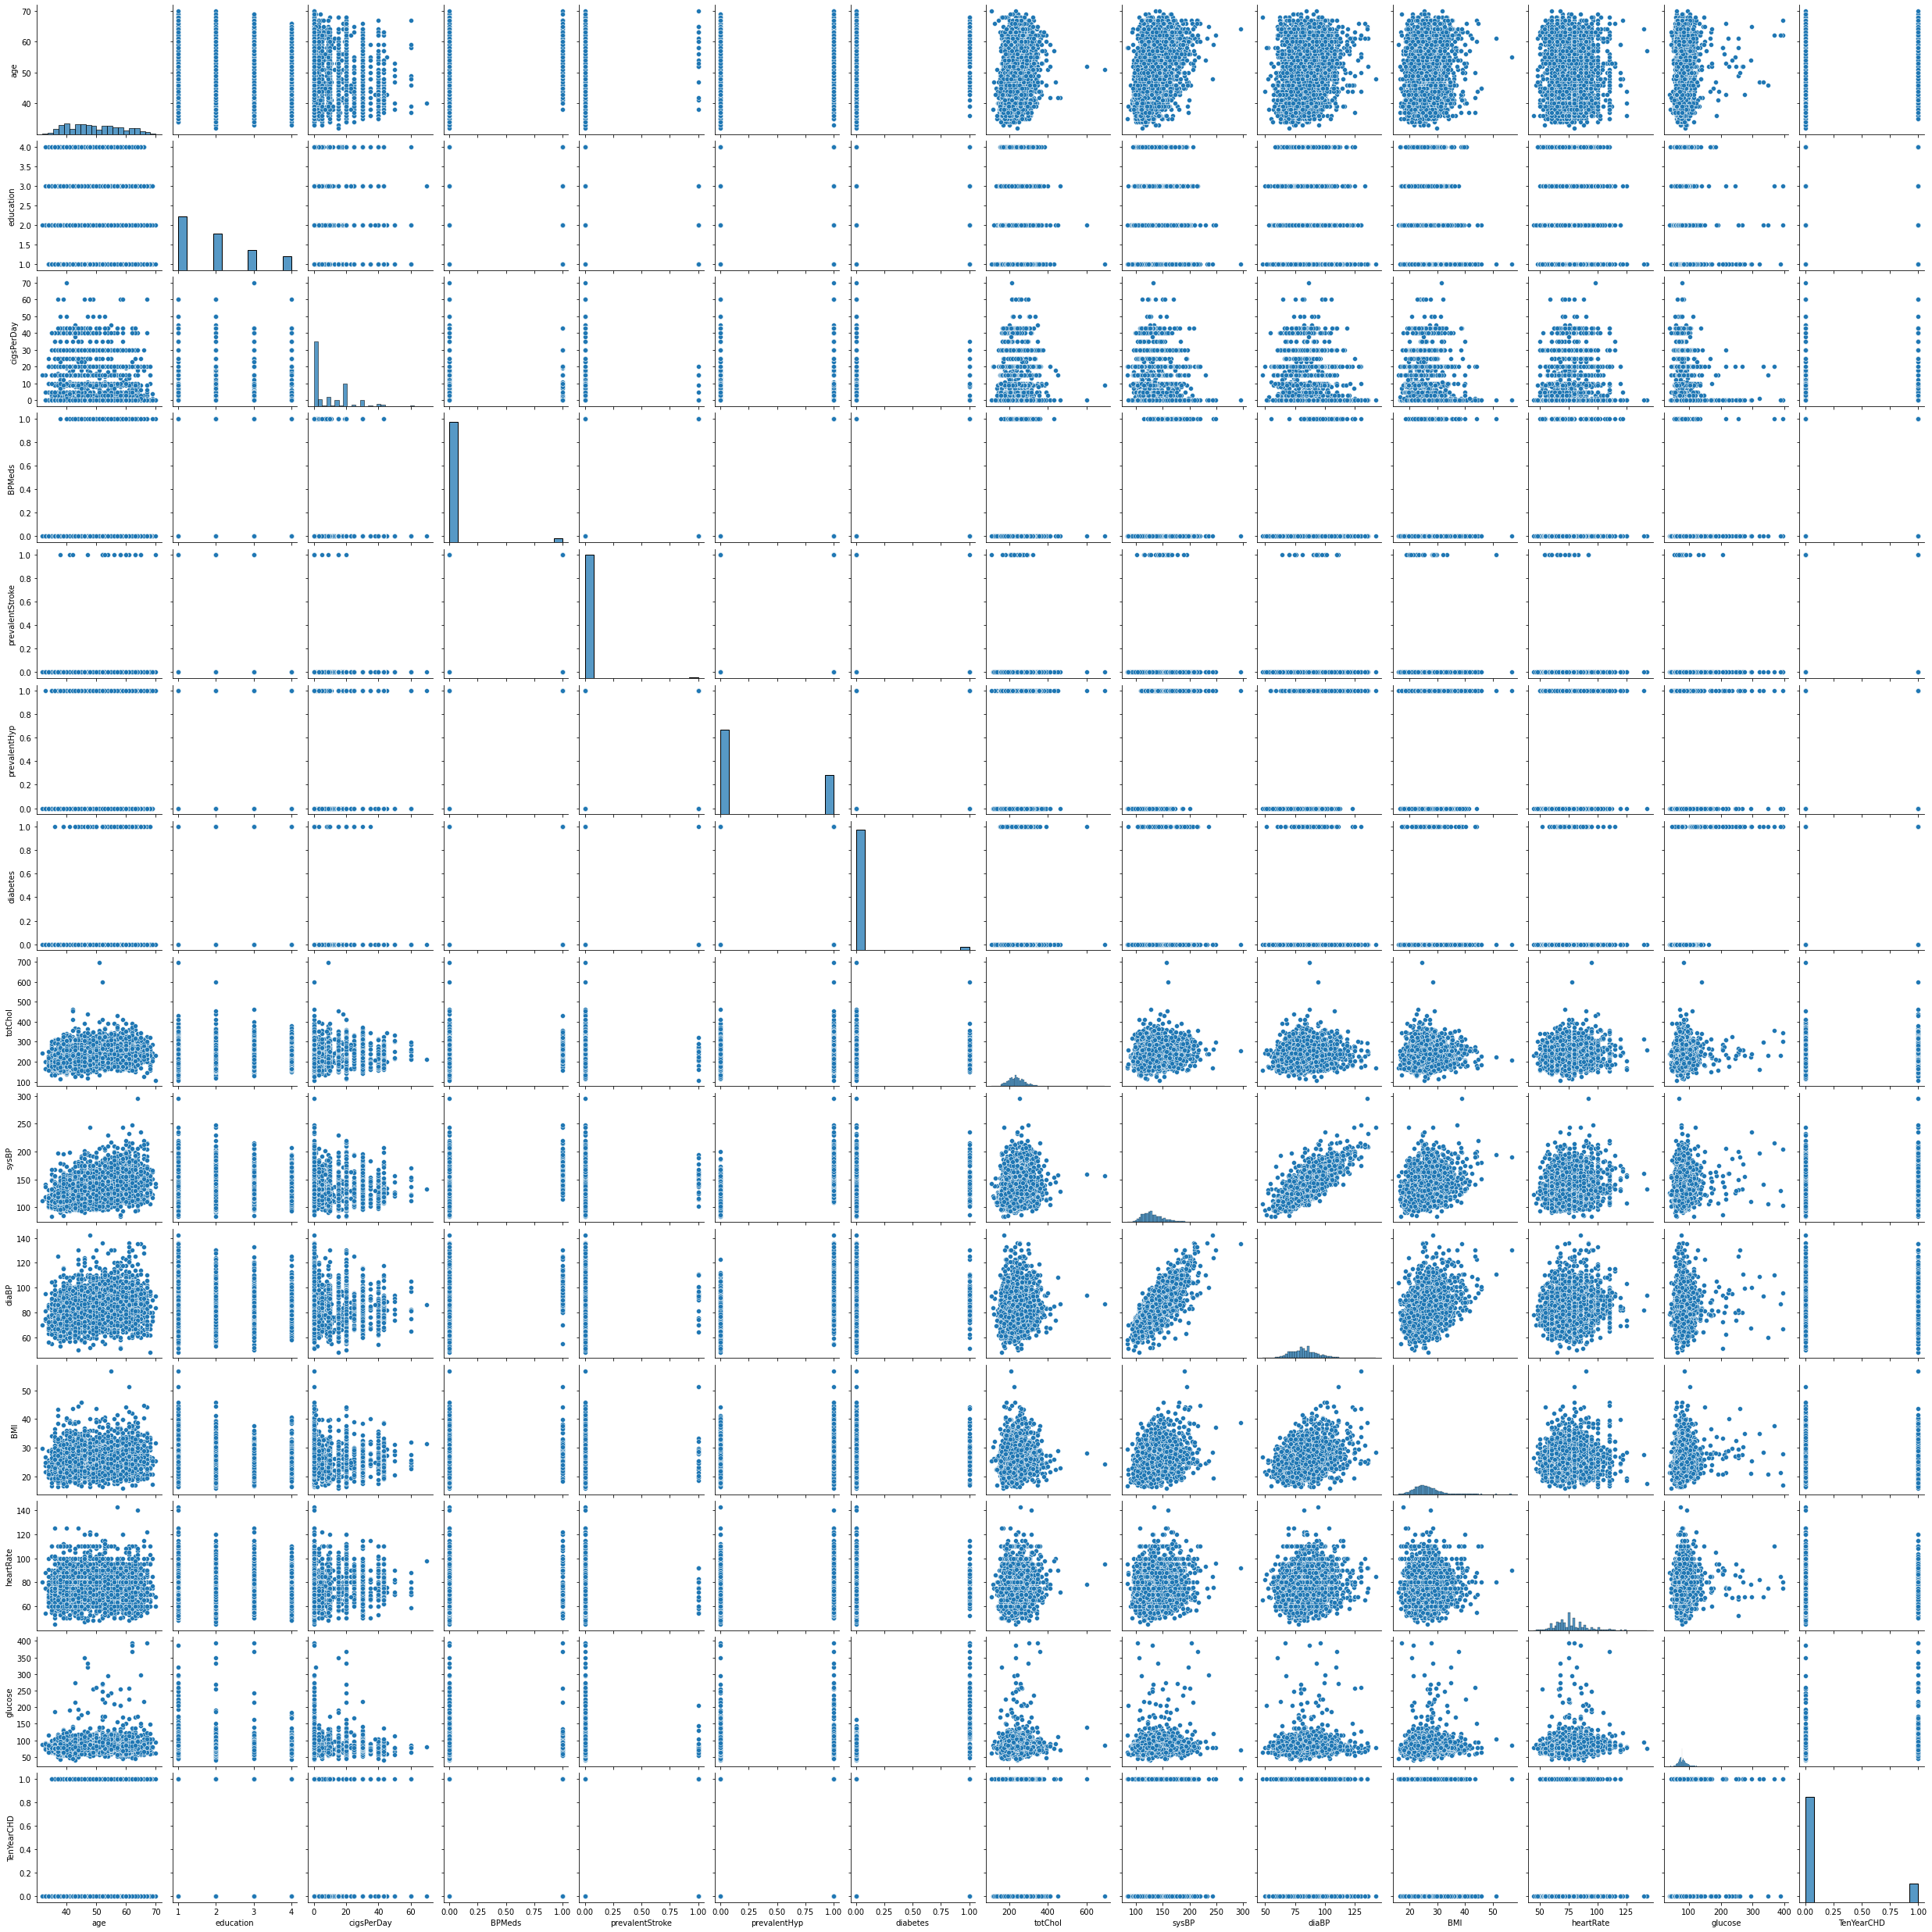

In [ ]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=cardio_df.drop(('id'), axis=1))

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Many of the features are not normally distributed and ‘sysBP’ is moderately correlated with ‘prevalenthyp’, i.e. prevalent hypertension. ‘diaBP’ and ‘sysBP’ are somewhat moderately correlated. ‘glucose’ level are also moderately correlated to whether patient is diabetic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it grows towards the negative growth , because the more correlated variables can create error or problem in the future prediction of chd.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 = As the age grow's it doesn't create any effect on cardiovascular disease.

H1 = As the age grow's it make effect on cardiovascular disease.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
  
# defining the table
data = [cardio_df['age'], cardio_df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

Chi - Square test has done to obtain P-Value.

##### Why did you choose the specific statistical test?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hyphothesis - Mean value of Cholestrol is 237

Alternative Hyphothesis - Mean value of Cholestrol is not 237 

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(cardio_df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject H0")
else:
    print("failed to reject H0")

0.9589015715213028
failed to reject H0


##### Which statistical test have you done to obtain P-Value?

Z Test is used to obtain P-value.

##### Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis =  PrevalentHyp does not have any influence in TenYearCHD

Alternative hypothesis = PrevalentHyp does have any influence in TenYearCHD

So ,

here the test is = Paired sample T test

Significance level = 0.05



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy
scipy.stats.ttest_rel(cardio_df['prevalentHyp'],cardio_df['TenYearCHD'])

Ttest_relResult(statistic=17.838852455509752, pvalue=4.183890468625829e-68)

##### Which statistical test have you done to obtain P-Value?

T-Test is used to obtain P-value.

##### Why did you choose the specific statistical test?

A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [27]:
# Handling Missing Values & Missing Value Imputation
#As it is already done during the data wrangling so it is not required to do it now.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [28]:
cardio_df.drop(labels= ['id'], axis =1 ,  inplace = True)

In [29]:
cardio_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


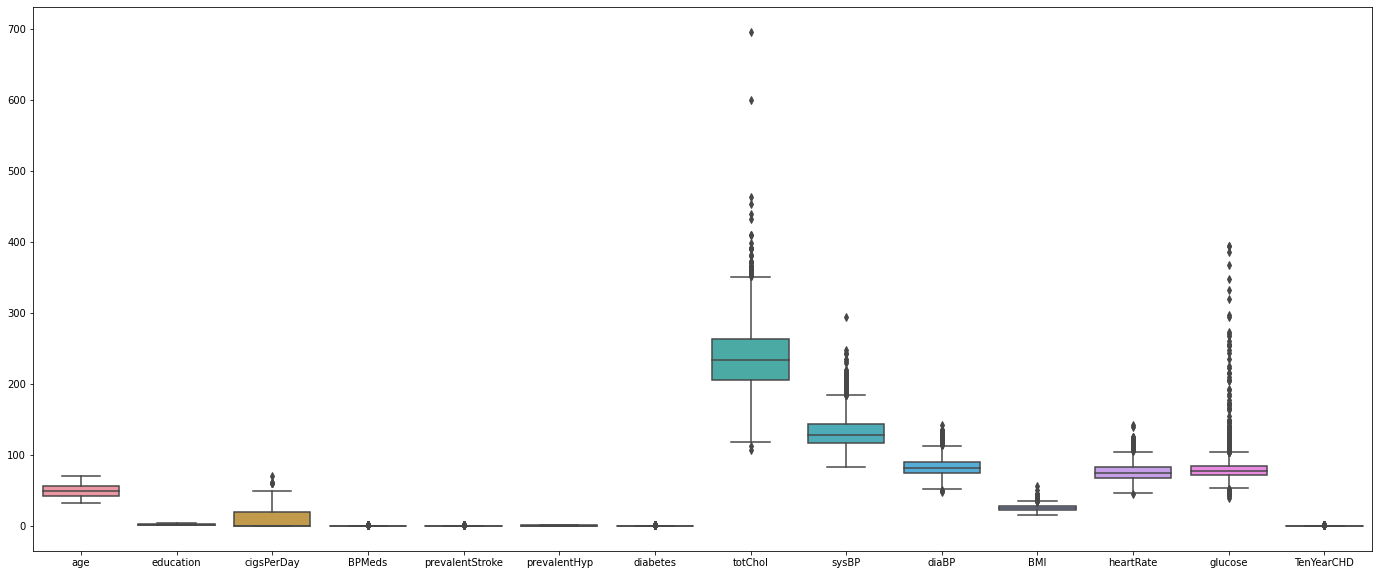

In [30]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(24,10))
sns.boxplot(data=cardio_df)

In [31]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = cardio_df[column].quantile(0.75)
    q1 = cardio_df[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(cardio_df[cardio_df[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(cardio_df[cardio_df[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(cardio_df[cardio_df[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [32]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
     

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


##### What all outlier treatment techniques have you used and why did you use those techniques?

Inter-Quartile method we have used to treat outlier.The dataframe above explains the effect of removing outliers. If the outliers in this scenario are removed, many rows will be lost, potentially resulting in CHD.

In this circumstance, it is known that people with high levels of Cholestrol, BP, Glucose, BMI, and so on are predisposed to heart disease. As a result, removing higher numbers is not considered.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [34]:
cardio_df = pd.get_dummies(cardio_df , columns=['sex'])

In [35]:
#education , BPMeds are categorical variables and cigsPerDay can be in integer form  .So , Converting the datatype from float to int.
cardio_df['education']=cardio_df['education'].astype(int)
cardio_df['BPMeds']=cardio_df['BPMeds'].astype(int)
cardio_df['cigsPerDay']=cardio_df['cigsPerDay'].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

So , the categorical encoding techniques of the cartegorical variables like education , bpmeds are converted into interger by simply as type and the variable like sex is done by get dummies and new two column is created as female and male and orther then that the cigsperday is also turned into interger form because it was unneeded into the form of flot when the units of cigs will always be in a specific number.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features

Since systolic BP and diastolic BP are showing high correlation we can combine them and generate a new feature Pulse Pressure which is nothing but the difference in the systolic BP and diastolic BP. 

Pulse Pressure = Systolic BP - Diastolic BP.

We got the above information from the following link -

https://en.wikipedia.org/wiki/Pulse_pressure

In [37]:
# Creating New Feature Pulse Pressure
cardio_df["pulse_pressure"] = cardio_df["sysBP"] - cardio_df['diaBP']
     

# Dropping the systolic and diastolic BP feature
cardio_df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

#### 2. Feature Selection

"is_smoking" and "cigsPerDay" features are same as if a person is smoking cigrates whatever quntity it may be the "is_smoking" feature will be yes. So, we will be dropping the is_smoking feature.

In [38]:
# Select your features wisely to avoid overfitting
# Dropping is_smoking feature.
cardio_df.drop("is_smoking",axis = 1, inplace = True)

In [39]:
# Final columns on whom model training and testing will be done is .
cardio_df.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_F', 'sex_M', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Since systolic BP and diastolic BP are showing high correlation we can combine them and generate a new feature Pulse Pressure which is nothing but the difference in the systolic BP and diastolic BP.


"is_smoking" and "cigsPerDay" features are same. So, we will be dropping the is_smoking feature.

##### Which all features you found important and why?

We are considering almost all the features for modeling. We are not removing any feature as it is a healthcare problem and every feature is extremly important in predicting the 10yr CHD. We can't afford to miss out any pattern by removing any feature as people life can be saved if we predict the data correctly. Even if we predict that the person is at a risk of 10yr CHD and he/she starts taking precaution our task will be fulfilled.

### 7. Handling Imbalanced Dataset

In [40]:
cardio_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Above data clearly shows that the classes are not balanced in the dependent variable. Class 0 is nearly 5times more than class 1.

In [121]:
# Representing  x= independent variable  and y = dependent variable .
x = cardio_df.drop(labels='TenYearCHD',axis=1)
y= cardio_df['TenYearCHD']

In [122]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE()
x,y = smote.fit_resample(x,y)
print(f'Shape of X - {x.shape}')
print(f'Shape of y - {y.shape}')
     

Shape of X - (5758, 14)
Shape of y - (5758,)


In [43]:
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [123]:
x.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'sex_F', 'sex_M', 'pulse_pressure'],
      dtype='object')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Oversampling Technique) is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE, otherwise after doing the split there will be uneven distribution of the dependent variable class among the train and test set and it may be possible that the train set will have very less number of positive class which will lead to errors while predicting.

SMOTE first selects a minority class instance x¹ at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors x² at random and connecting x¹ and x² to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances x² and x¹.



### 6. Data Scaling

In [124]:
# Scaling your data
Scaler = MinMaxScaler()
x= Scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used MinMaxScaler to scale the data. MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. MinMaxScaler doesn't reduce the importance of outliers.

### 5. Data Splitting

In [125]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.2 , random_state= 0)

##### What data splitting ratio have you used and why? 

For this project we have used 80:20 split for splitting the data into test and train dataset.

This is the most widely used split also known as Pareto Principle which tells that, 80% of effects come from 20% of causes.

## ***7. ML Model Implementation***

**Functions to evaluate and plot evalutaion metrics**

In [46]:
#Function to evaluate all the evaluation metrics
def evaluation_metrics(xtr, ytr, xtes, ytes, train_pred, test_pred):
  '''This function will return a dictionary containing accuracy_score, precision_score, recall_score & roc_auc_score for the train & test data.
  Also it will plot the confusion matrix and ROC AUC Curve
  Just pass X_train, y_train, x_test, y_test, y_train_pred, y_test_pred to this function'''
  train_accuracy = accuracy_score(ytr, train_pred)
  test_accuracy = accuracy_score(ytes, test_pred)
  train_precision = precision_score(ytr, train_pred)
  test_precision = precision_score(ytes, test_pred)
  train_recall = recall_score(ytr, train_pred)
  test_recall = recall_score(ytes, test_pred)
  train_roc_auc = roc_auc_score(ytr, train_pred)
  test_roc_auc = roc_auc_score(ytes, test_pred)
  cm_train = confusion_matrix(ytr, train_pred)
  cm_test = confusion_matrix(ytes, test_pred)
  model_evaluation_metrics = { "Train Accuracy":train_accuracy,
                              "Test Accuracy":test_accuracy,
                              "Train Precision":train_precision,
                              "Test Precision":test_precision,
                              "Train Recall":train_recall,
                              "Test Recall":test_recall,
                              "Train ROC-AUC Score":train_roc_auc,
                              "Test ROC-AUC Score":test_roc_auc
                              }
  return (model_evaluation_metrics, cm_train, cm_test)

In [47]:
# Function to plot heat map
def confusion_matrix_plot(cm,title):
  ''' This function will plot the heatmap for confusion matrix.
  Pass the confusion matrix & title of the plot in str to plot the heatmap'''
  plt.figure(figsize=(7,5))
  ax = sns.heatmap(cm, annot=True, linewidths = 0.1, cmap='Purples', linecolor='Black' , fmt = '0.2f')
  ax.set_xlabel('Predicted TenYearCHD')
  ax.set_ylabel('True TenYearCHD')
  ax.set_title(title)
  plt.show()

In [48]:
#Function to plot ROC AUC curve
def rocauc_plot(ytesc, ytescprob ):
  '''This function will plot the ROC AUC curve.
  Pass y_test, y_predict_prob and title of the plot in str to plot the ROC AUC curve.
  Also this curve will return fpr & tpr.'''
  fpr, tpr, thresholds = roc_curve(ytesc, ytescprob)
  plt.figure(figsize=(7,5))
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC Curve')
  plt.show()
  #return (fpr, tpr)
     

### ML Model - 1 - Logistic Regression

In [49]:
# ML Model - 1 Implementation
lgr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lgr.fit(x_train, y_train)
# Predict on the model
lgr_preds_prob = lgr.predict_proba(x_test)[:,1]
lgr_test_preds= lgr.predict(x_test)
lgr_train_preds = lgr.predict(x_train)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
lgr_eval_matric , cm_train , cm_test = evaluation_metrics(x_train, y_train, x_test, y_test, lgr_train_preds, lgr_test_preds)

In [51]:
evaluation_df_lgr = pd.Series(data = lgr_eval_matric)
print(evaluation_df_lgr)

Train Accuracy         0.748806
Test Accuracy          0.732639
Train Precision        0.780050
Test Precision         0.786982
Train Recall           0.685965
Test Recall            0.666110
Train ROC-AUC Score    0.748185
Test ROC-AUC Score     0.735406
dtype: float64


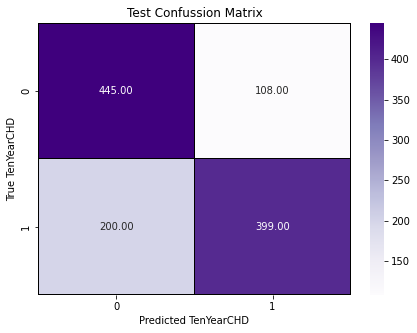

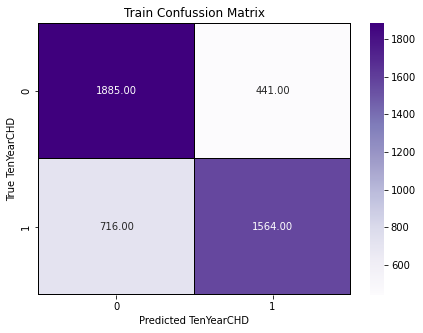

In [52]:
#For test
confusion_matrix_plot(cm_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(cm_train , 'Train Confussion Matrix' )

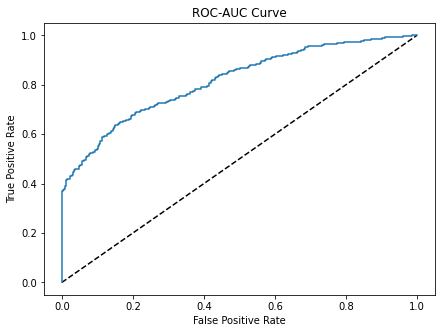

In [53]:
rocauc_plot(y_test, lgr_preds_prob )

Logistic Regression we used as the First model to predict the TenYearCHD.Accuracy for test data is 74%, Precision for test data is also 74%, Recall for test data is 69% and ROC-AUC score for test data is 73%. Being such a simple algorithm Logistic Regression did a great work in Predicting TenYearCHD.Lets try orther Model and try to increase the accuracy.

### ML Model - 2 - Random Forest

In [54]:
# ML Model - 2 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(x_train, y_train)
# Predict on the model
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)
rfc_y_pred_proba = rfc.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
rfc_eval_matric , rf_train , rf_test = evaluation_metrics(x_train, y_train, x_test, y_test, rfc_train_pred, rfc_test_pred)

In [56]:
evaluation_df_rfc = pd.Series(data = rfc_eval_matric)
print(evaluation_df_rfc)

Train Accuracy         1.000000
Test Accuracy          0.893229
Train Precision        1.000000
Test Precision         0.914634
Train Recall           1.000000
Test Recall            0.876461
Train ROC-AUC Score    1.000000
Test ROC-AUC Score     0.893927
dtype: float64


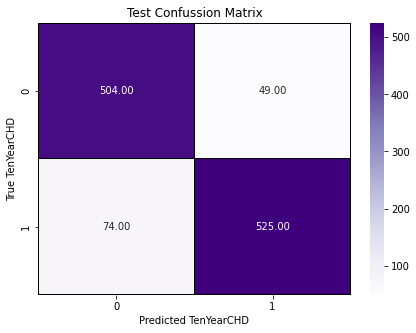

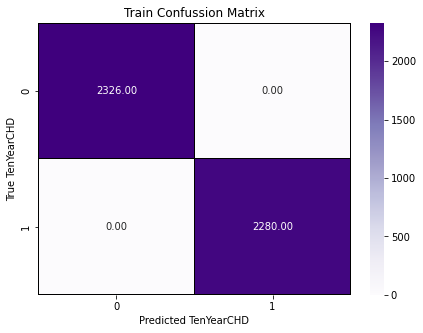

In [57]:
#For test
confusion_matrix_plot(rf_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(rf_train , 'Train Confussion Matrix' )

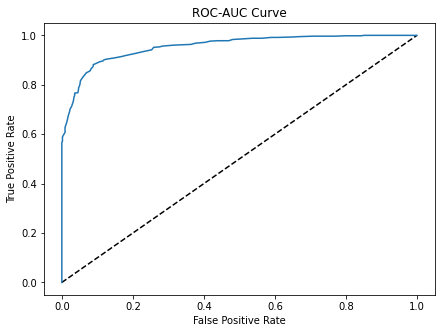

In [58]:
rocauc_plot(y_test, rfc_y_pred_proba )

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_cv = RandomForestClassifier(random_state=2)

# GridSearch to find the best parameters
grid = {'n_estimators' : [100,150,200],
        'max_depth' : [15,20,25],
        'min_samples_split' : [30,40,50],
        'min_samples_leaf' : [2,5,10]}
rfc_grid = GridSearchCV(rfc_cv, param_grid = grid, scoring = 'accuracy' , cv=5)
# Fit the Algorithm
rfc_grid.fit(x_train, y_train)
best_model = rfc_grid.best_estimator_
# Predict on the model
rfc_cv_train_pred = best_model.predict(x_train)
rfc_cv_test_pred = best_model.predict(x_test)
rfc_cv_y_pred_proba = best_model.predict_proba(x_test)[:,1]

In [60]:
best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=30,
                       n_estimators=150, random_state=2)

In [61]:
rfc_cv_eval_matric , rfcv_train , rfcv_test = evaluation_metrics(x_train, y_train, x_test, y_test, rfc_cv_train_pred, rfc_cv_test_pred)

In [62]:
evaluation_df_rfc_cv = pd.Series(data = rfc_cv_eval_matric)
print(evaluation_df_rfc_cv)

Train Accuracy         0.916196
Test Accuracy          0.821181
Train Precision        0.947120
Test Precision         0.871456
Train Recall           0.879825
Test Recall            0.769616
Train ROC-AUC Score    0.915837
Test ROC-AUC Score     0.823325
dtype: float64


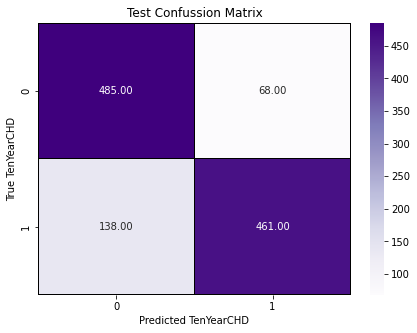

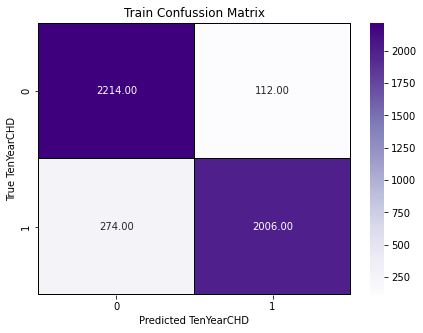

In [63]:
#For test
confusion_matrix_plot(rfcv_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(rfcv_train , 'Train Confussion Matrix' )

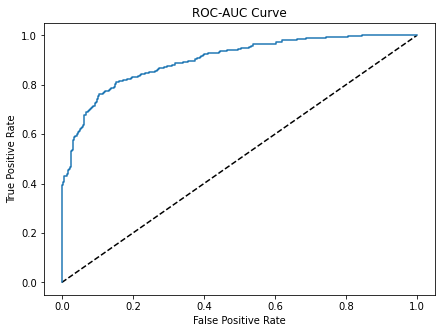

In [64]:
rocauc_plot(y_test, rfc_cv_y_pred_proba )

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here - After cross validation scores decreased instead
accuracy , precision or roc-auc score all comes down from 1 to 0.90 , 0.93,0.90 respectively.

### ML Model - 3 - Naive Bayes

In [65]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_train, y_train)
# Predict on the model
nb_y_train_pred = nb.predict(x_train)
nb_y_pred_proba = nb.predict_proba(x_test)[:,1]
nb_y_test_pred = nb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart
nb_eval_matric , nb_cm_train , nb_cm_test = evaluation_metrics(x_train, y_train, x_test, y_test, nb_y_train_pred, nb_y_test_pred)

In [67]:
evaluation_df_nb = pd.Series(data= nb_eval_matric)
print(evaluation_df_nb)

Train Accuracy         0.653495
Test Accuracy          0.633681
Train Precision        0.730458
Test Precision         0.733509
Train Recall           0.475439
Test Recall            0.464107
Train ROC-AUC Score    0.651735
Test ROC-AUC Score     0.640733
dtype: float64


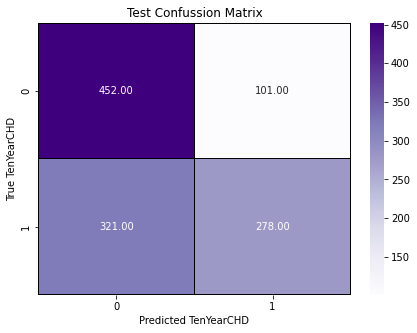

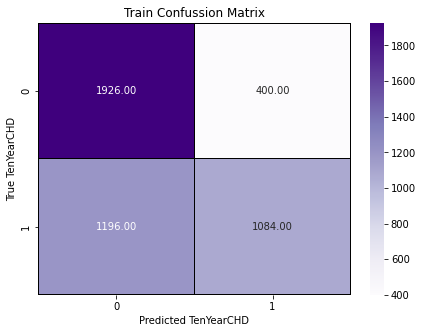

In [68]:
#For test
confusion_matrix_plot(nb_cm_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(nb_cm_train , 'Train Confussion Matrix' )

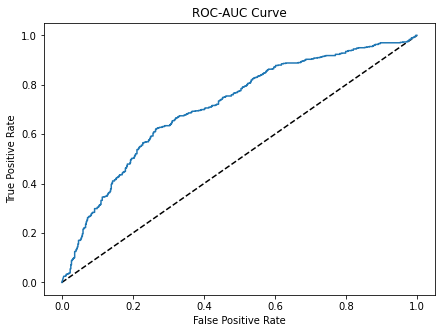

In [69]:
rocauc_plot(y_test, nb_y_pred_proba )

Navive Bayes  modelis used  to predict the TenYearCHD.Accuracy for test data is 65%, Precision for test data is also 74%, Recall for test data is 48% and ROC-AUC score for test data is 65%. Being such a great algorithm this model did a decent work in Predicting TenYearCHD. But not so Promising so we are not continuing to do cross validation and Lets try orther Model and try to increase the accuracy and orther result.

### ML Model - 4 - KNN

In [70]:
# ML Model - 2 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(x_train, y_train)
# Predict on the model
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
knn_preds_prob = knn.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart
knn_eval_matric , knn_train , knn_test = evaluation_metrics(x_train, y_train, x_test, y_test, knn_train_pred, knn_test_pred)

In [72]:
evaluation_df_knn = pd.Series(data=knn_eval_matric)
print(evaluation_df_knn)

Train Accuracy         0.945289
Test Accuracy          0.815104
Train Precision        1.000000
Test Precision         0.864151
Train Recall           0.889474
Test Recall            0.764608
Train ROC-AUC Score    0.944737
Test ROC-AUC Score     0.817204
dtype: float64


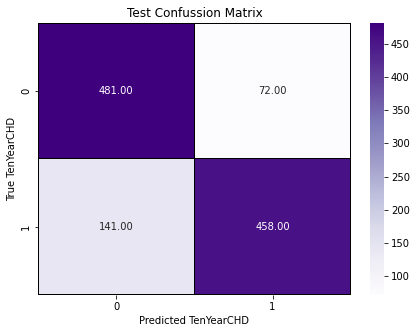

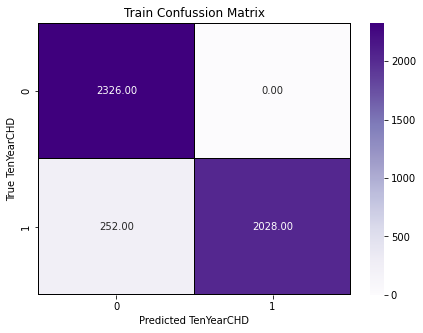

In [73]:
#For test
confusion_matrix_plot(knn_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(knn_train , 'Train Confussion Matrix' )

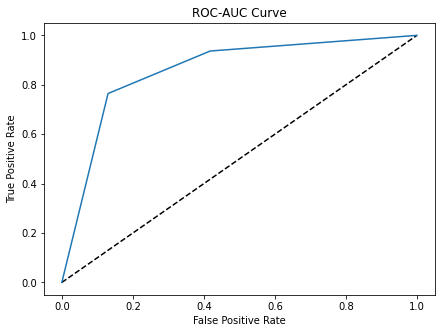

In [74]:
rocauc_plot(y_test, knn_preds_prob )

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 
# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,150)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_train, y_train)
# Predict on the model
knn_cv_train_pred = knn_cv.predict(x_train)
knn_cv_test_pred = knn_cv.predict(x_test)
knn_y_pred_proba = knn_cv.predict_proba(x_test)[:,1]

In [76]:
knn_cv_eval_matric , knncv_train , knncv_test = evaluation_metrics(x_train, y_train, x_test, y_test, knn_cv_train_pred, knn_cv_test_pred)

In [77]:
evaluation_df_cv_knn = pd.Series(data= knn_cv_eval_matric)
print(evaluation_df_cv_knn)

Train Accuracy         1.000000
Test Accuracy          0.823785
Train Precision        1.000000
Test Precision         0.799094
Train Recall           1.000000
Test Recall            0.883139
Train ROC-AUC Score    1.000000
Test ROC-AUC Score     0.821316
dtype: float64


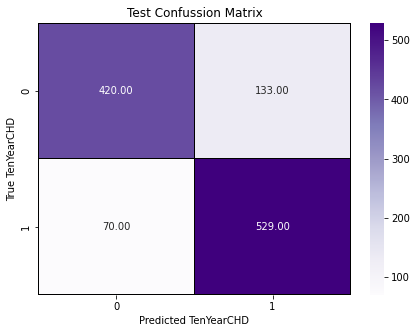

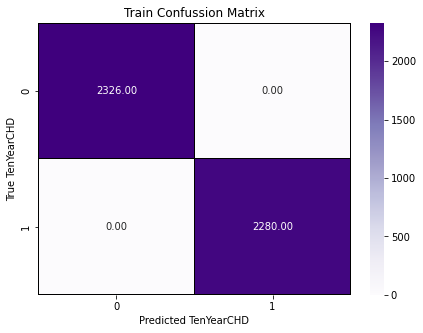

In [78]:
#For test
confusion_matrix_plot(knncv_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(knncv_train , 'Train Confussion Matrix' )

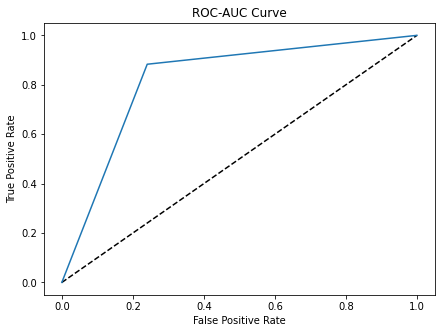

In [79]:
rocauc_plot(y_test, knn_y_pred_proba )

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Improvement has been observed after cross validation.

Before the accuracy was 0.80 and now 0.82  aucroc value  and precision is also increased to 0.82 and 0.80 this are made which is large improvement but by looking into train data its seems like it is been overfit then too this seems to be one of the best model till now but lets see orther model .

### ML Model - 5 - XGBoost

In [80]:
# ML Model - 4 Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
xgb_train_pred = xgb.predict(x_train)
xgb_test_pred = xgb.predict(x_test)
xgb_y_pred_proba = xgb.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Visualizing evaluation Metric Score chart
xgb_eval_matric , xgb_train , xgb_test = evaluation_metrics(x_train, y_train, x_test, y_test, xgb_train_pred, xgb_test_pred)

In [82]:
evaluation_df_xgb = pd.Series(data=xgb_eval_matric)
print(evaluation_df_xgb)

Train Accuracy         0.728181
Test Accuracy          0.713542
Train Precision        0.736431
Test Precision         0.743219
Train Recall           0.702193
Test Recall            0.686144
Train ROC-AUC Score    0.727924
Test ROC-AUC Score     0.714681
dtype: float64


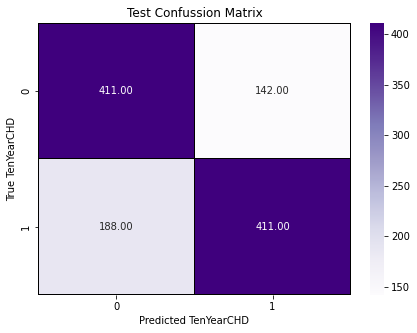

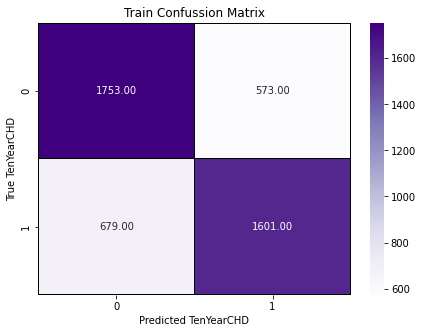

In [83]:
#For test
confusion_matrix_plot(xgb_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(xgb_train , 'Train Confussion Matrix' )

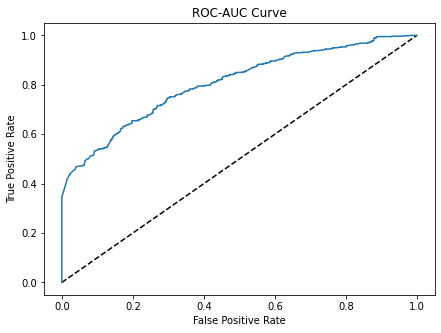

In [84]:
rocauc_plot(y_test, xgb_y_pred_proba )

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [200],
        'max_depth' : [10,12],
        'min_samples_split' : [2,10],
        'min_samples_leaf' : [1,2] }
xgb_cv= GridSearchCV(xgb, param_grid = grid, scoring = 'accuracy' , cv=5)

# Fit the Algorithm
xgb_cv.fit(x_train, y_train)
# Predict on the model
xgb_cv_train_pred = xgb_cv.predict(x_train)
xgb_cv_test_pred = xgb_cv.predict(x_test)
xgb_cv_y_pred_proba = xgb_cv.predict_proba(x_test)[:,1]

In [107]:
xgb_cv.best_estimator_

XGBRFClassifier(max_depth=12, min_samples_leaf=1, min_samples_split=2,
                n_estimators=200)

In [86]:
xgb_cv_eval_matric , xgbcv_train , xgbcv_test = evaluation_metrics(x_train, y_train, x_test, y_test, xgb_cv_train_pred, xgb_cv_test_pred)

In [87]:
evaluation_df_cv_xgb = pd.Series(data= xgb_cv_eval_matric)
print(evaluation_df_cv_xgb)

Train Accuracy         0.953105
Test Accuracy          0.835938
Train Precision        0.967391
Test Precision         0.872727
Train Recall           0.936842
Test Recall            0.801336
Train ROC-AUC Score    0.952944
Test ROC-AUC Score     0.837377
dtype: float64


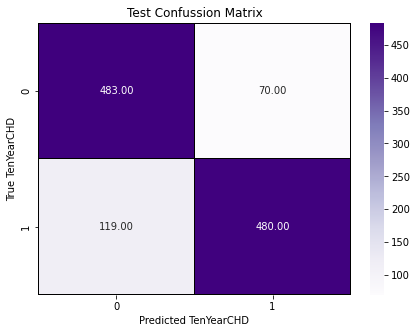

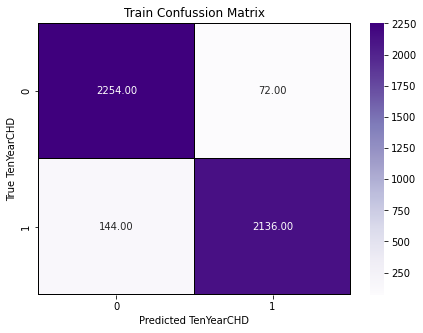

In [88]:
#For test
confusion_matrix_plot(xgbcv_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(xgbcv_train , 'Train Confussion Matrix' )

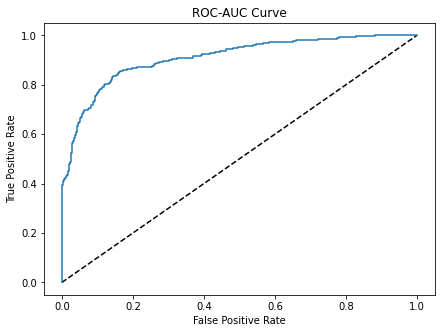

In [89]:
rocauc_plot(y_test, xgb_cv_y_pred_proba )

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before the accuracy was 0.73 and now 0.84 aucroc value and precision is also increased to 0.84 and 0.86 this are made which is large improvement but by looking into train data its seems like it is been not overfit and seems ok then too this seems to be one of the best model till now better than knn.

### ML Model - 6 - SVM 

In [90]:
# ML Model - 3 Implementation
svc = SVC(probability = True)
# Fit the Algorithm
svc.fit(x_train,y_train)
# Predict on the model
svc_train_pred = svc.predict(x_train)
svc_test_pred = svc.predict(x_test)
svc_y_prob = svc.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart
svc_eval_matric , svc_train , svc_test = evaluation_metrics(x_train, y_train, x_test, y_test, svc_train_pred, svc_test_pred)

In [92]:
evaluation_df_svc = pd.Series(data=svc_eval_matric)
print(evaluation_df_svc)

Train Accuracy         0.763569
Test Accuracy          0.752604
Train Precision        0.813256
Test Precision         0.831224
Train Recall           0.678070
Test Recall            0.657763
Train ROC-AUC Score    0.762724
Test ROC-AUC Score     0.756549
dtype: float64


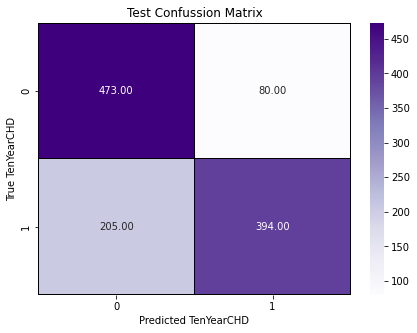

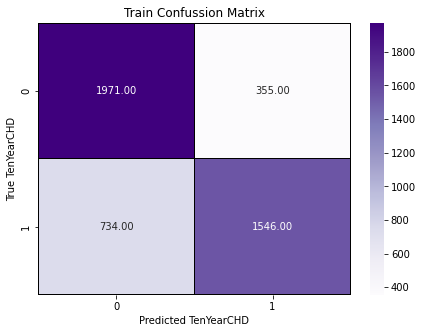

In [93]:
#For test
confusion_matrix_plot(svc_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(svc_train , 'Train Confussion Matrix' )

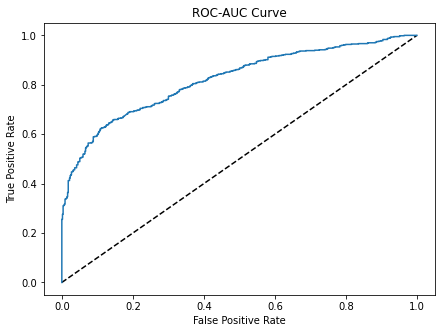

In [94]:
rocauc_plot(y_test,svc_y_prob )

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Implementing SVM with hyperparameter tuning.

#Selecting the various kernel types
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

#Selecting the degree for polynomial functions
degree = [3,4,5]

parameters_svc = {'kernel' : kernel,'degree' : degree}
svc = SVC(probability = True)

# Grid search
svc_cv = GridSearchCV(estimator=svc, param_grid = parameters_svc, cv = 5, scoring='roc_auc')
# Fit the Algorithm
svc_cv.fit(x_train,y_train)
# Predict on the model
svc_cv_train_pred = svc_cv.predict(x_train)
svc_cv_test_pred = svc_cv.predict(x_test)
svc_cv_y_pred_proba = svc_cv.predict_proba(x_test)[:,1]

In [96]:
svc_cv_eval_matric , svccv_train , svccv_test = evaluation_metrics(x_train, y_train, x_test, y_test, svc_cv_train_pred, svc_cv_test_pred)

In [97]:
evaluation_df_cv_svc = pd.Series(data= svc_cv_eval_matric)
print(evaluation_df_cv_svc)

Train Accuracy         0.782241
Test Accuracy          0.751736
Train Precision        0.839808
Test Precision         0.828092
Train Recall           0.692105
Test Recall            0.659432
Train ROC-AUC Score    0.781349
Test ROC-AUC Score     0.755575
dtype: float64


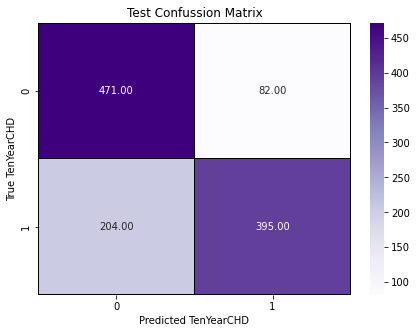

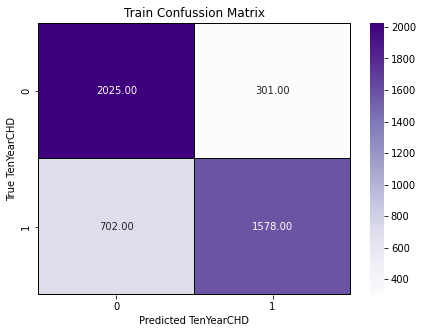

In [98]:
#For test
confusion_matrix_plot(svccv_test , 'Test Confussion Matrix' )
#for Train
confusion_matrix_plot(svccv_train , 'Train Confussion Matrix' )

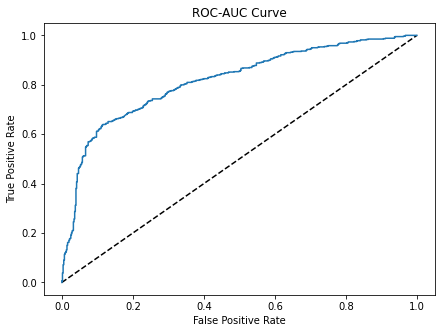

In [99]:
rocauc_plot(y_test , svc_cv_y_pred_proba )

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before the accuracy was 0.74 and now 0.75 it has been improved but dont make much difference .

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In medical industry specificity and sensitivity or ROC-AUC score which shows the area under sensitivity vs specificity curve are the best metrics to evaluate any model. As, it shows how much positive and negative class we are able to recall from the dataset.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [100]:
emetrics_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                    'Train ROC-AUC Score', 'Test ROC-AUC Score'])

evaluation_df_lgr['Model'] = "Logistic"
evaluation_df_nb['Model'] = "Naive Bayes"
evaluation_df_rfc['Model'] = "Random Forest"
evaluation_df_rfc_cv['Model'] = "Random Forest CV "
evaluation_df_xgb['Model'] = "XG Boost"
evaluation_df_cv_xgb['Model'] = "XG Boost CV"
evaluation_df_knn['Model'] = "KNN"
evaluation_df_cv_knn['Model'] = "KNN CV "
evaluation_df_svc['Model'] = "SVM"
evaluation_df_cv_svc['Model'] = "SVM"

models_dicts = [evaluation_df_lgr, evaluation_df_rfc, evaluation_df_rfc_cv ,evaluation_df_nb ,evaluation_df_knn,evaluation_df_cv_knn,evaluation_df_xgb,
                evaluation_df_cv_xgb,evaluation_df_svc,evaluation_df_cv_svc]

for m in models_dicts:
  emetrics_df = emetrics_df.append(m, ignore_index = True)

emetrics_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic,0.748806,0.732639,0.780050,0.786982,0.685965,0.666110,0.748185,0.735406
1,Random Forest,1.000000,0.893229,1.000000,0.914634,1.000000,0.876461,1.000000,0.893927
2,Random Forest CV,0.916196,0.821181,0.947120,0.871456,0.879825,0.769616,0.915837,0.823325
3,Naive Bayes,0.653495,0.633681,0.730458,0.733509,0.475439,0.464107,0.651735,0.640733
4,KNN,0.945289,0.815104,1.000000,0.864151,0.889474,0.764608,0.944737,0.817204
5,KNN CV,1.000000,0.823785,1.000000,0.799094,1.000000,0.883139,1.000000,0.821316
6,XG Boost,0.728181,0.713542,0.736431,0.743219,0.702193,0.686144,0.727924,0.714681
7,XG Boost CV,0.953105,0.835938,0.967391,0.872727,0.936842,0.801336,0.952944,0.837377
8,SVM,0.763569,0.752604,0.813256,0.831224,0.678070,0.657763,0.762724,0.756549
9,SVM,0.782241,0.751736,0.839808,0.828092,0.692105,0.659432,0.781349,0.755575


So , from the table above we can say that the random forest without any hyperparamter it is showing great results with high accuracy of 0.88 and roc-auc with 0.88 too but as we applied the cross validation with grid search and look with best parameter then the accuracy and roc-auc value both reduce which doesnt seems right and from which we can say that it is being overfit to the model and also with the knn with hyperparameter it goes well with trainig data but with test data it reduce less or doesnt give good result as the xgboost with hyperparametr is giving .

So, we are selecting the Xgboost with hyperparameter as the Prediction Model because it is giving the result with high accuracy of 0.84 and rou-auc value of 0.84 and precision of 0.86 which is great and also it doesnt seems like overfitting .

Model - XGBOOST CLASSIFER:

Train Accuracy            0.953105

Test Accuracy             0.835938

Train Precision           0.967391

Test Precision            0.872727

Train Recall              0.936842

Test Recall               0.801336

Train ROC-AUC Score       0.952944

Test ROC-AUC Score        0.837377

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

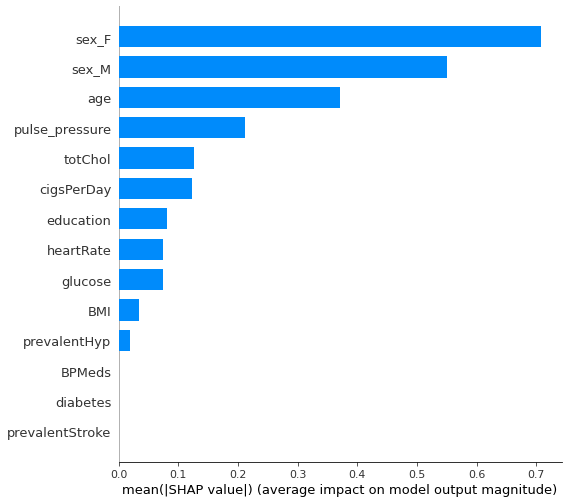

In [130]:
# Creating instances of shap
explainer = shap.TreeExplainer(xgb_cv.best_estimator_)
shap_values = explainer.shap_values(x_test)
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(x_test, columns =['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'sex_F', 'sex_M', 'pulse_pressure'])
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

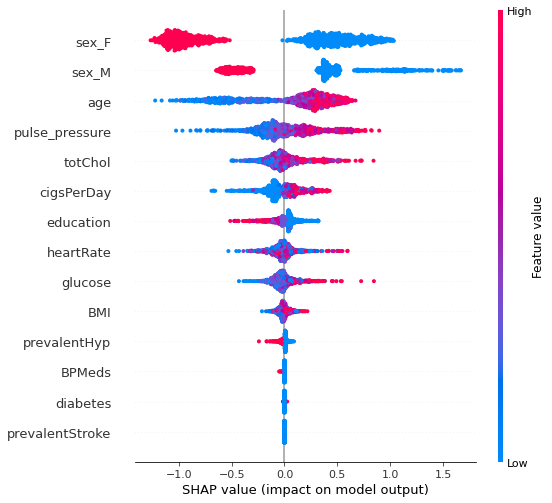

In [131]:
# Obtain a Scatter Summary Plot
shap.summary_plot(shap_values, shap_df)

The above plot shows the feature importances of the dataset.

-Gender is the most influencing factor in prediction.


-age, cigsPerDay, pulsePressure,totChol & heartRate also shows good contribution in prediction.

-Other features are having less contribution in prediction. Least being BPMeds,diabetes & prevalentStroke.





## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [133]:
# Save the File
import pickle
filename='cardiovascular_risk_prediction'
pickle.dump(xgb_cv,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [134]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.fit(x_train,y_train)
loaded_model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

EDA :

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***